In [2]:
import requests
from bs4 import BeautifulSoup

# Задание 1


Дано: [Сайт Библио-Глобуса](https://www.biblio-globus.ru)

Если сайт Библио-Глобуса помре, то можно [сайт Читай-Города](https://www.chitai-gorod.ru)

Задание: средствами парсинга ответить на список вопросов ниже


1) Какова в среднем длина (в страницах) книги из категории классическая литература в ассортименте магазина?

2) Какое у этих книг распределение цен? (попробуйте нарисовать [гистограмму](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

3) Как соотносятся средние цены книг по Python, Машинному обучению и C++ ? (поясните, как именно вы доставали такие книги :), то есть "я буду доставать книги вот так, потому что...")


In [71]:
import pandas as pd
import re
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
# Решение

# Для сбора данных об ассортименте классической прозе на сайте Читай-Города будем идти по страницам каталога
# и переходить на каждый товар (книгу), чтобы забрать оттуда нужную инфу.
# Результаты складываем в словарь, из которого потом сделаем датафрейм и сохраним в csv.

base_url = 'https://www.chitai-gorod.ru'
catalog_classic_url = '/catalog/books/klassicheskaya-proza-110003'

data = {"name": [], "author": [], "numberOfPages": [], "price": []}

for i in tqdm(range(100, 254), leave=True, desc='Pages'):
    # В параметры GET запроса передаем номер страницы
    params={'page': str(i)}
    page_content = requests.get(base_url+catalog_classic_url, params).text
    page_soup = BeautifulSoup(page_content)
    # Каждая книга на текущей страницы лежит пот тегом 'article'
    articles = page_soup.find_all('article')
    
    for article in tqdm(articles, leave=False, desc='Books on the current page'):
        # Достаем ссылку на книгу и переходим на страницу товара
        book_url = article.find('div', 'product-card__text product-card__row').find('a').get('href')
        book_content = requests.get(base_url+book_url).text
        
        book_soup = BeautifulSoup(book_content)
        
        # Стасикваем нужную инфу о товаре в словарь (если инфы нет, то кладем None)
        for key in data.keys():
            
            try:
                key_data = book_soup.find('body').find('div').find('span', attrs={"data-v-593c822d": None, "itemprop": key})
            except AttributeError:
                key_data = None

            data[key].append(key_data.text.strip()) if key_data != None else data[key].append(None)


Pages:   0%|          | 0/154 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page: 0it [00:00, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/48 [00:00<?, ?it/s]

Books on the current page:   0%|          | 0/26 [00:00<?, ?it/s]

In [134]:
# Cделаем из результатов парсинга ДатаФрейм и сохраним
classic_df = pd.DataFrame(data)

classic_df.to_csv('classic_literature.csv')

In [75]:
# Загружаем csv файл (чтобы не парсить второй раз)

classic_df = pd.read_csv('classic_literature.csv')

classic_df.head()

,Unnamed: 0,name,author,numberOfPages,price
0,0,Сон в красном тереме в 2 т. (комплект),Цао Сюэ-цинь,1760.0,1 698 ₽
1,1,Портрет Дориана Грея,Оскар Уайльд,320.0,180 ₽
2,2,NaN,NaN,336.0,595 ₽
3,3,Троецарствие: роман,Ло Гуань-чжун,1376.0,1 176 ₽
4,4,Мастер и Маргарита,Михаил Булгаков,512.0,534 ₽


In [76]:
# Маски для столбцов с номерами страниц и ценами
num_pages_mask = classic_df.numberOfPages.notna()
price_mask = classic_df.price.notna()

# Переводим столбец с номерами страниц в int32
num_pages = classic_df.numberOfPages[num_pages_mask].astype('int32')

# Удляем все лишние символы из столбца price и переводим в int32
classic_df.price.replace(re.compile(r'[^0-9]+'), '', inplace=True)
prices = classic_df.price[price_mask].astype('int32')

Среднее кол-во страниц: 458.8244839087713


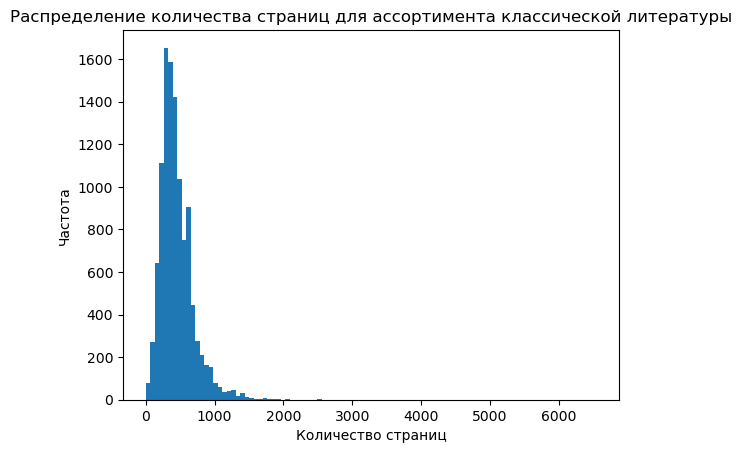

In [77]:
# Строим гистограмму распределения для количества страниц, выводим среднее
num_pages_hist = num_pages.plot(
    kind='hist',
    bins=100,
    title='Распределение количества страниц для ассортимента классической литературы',
)

print(f"Среднее кол-во страниц: {num_pages.mean()}")

num_pages_hist.set_xlabel('Количество страниц')
num_pages_hist.set_ylabel('Частота')


plt.show()

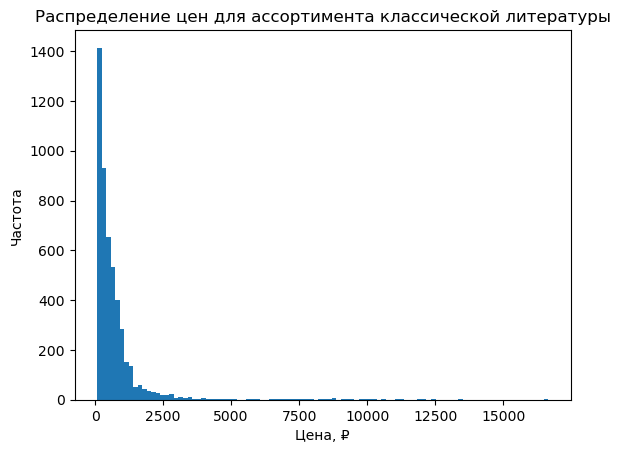

In [78]:
# Строим гистограмму распределения цен на классическую литературу

prices_hist = prices.plot(
    kind='hist',
    bins=100,
    title='Распределение цен для ассортимента классической литературы',
)

prices_hist.set_xlabel('Цена, ₽')
prices_hist.set_ylabel('Частота')


plt.show()

In [41]:
# Найдем книги по 'python', 'C++', 'Машинное обучение' и сравним средние цены на них.
# Я буду делать это, используя поиск по сайту, потому что это первый способ, который пришел в голову,
# а еще он простой и работает.
# Используя базовую URL для поиска 'https://www.chitai-gorod.ru/search' передаем в параметры
# текстовый запрос и номер страницы результатов поиска. Так как в response я не нашел информацию о том, 
# сколько всего страниц нашлось по тому или иному запросу, я итерирую от 1 до 9 страницы
# (больше по этим запросам не дает, я проверял), и, когда возвращается пустая страница прерываю цикл.
# Переходить на страницы товаров в данном случае не нужно, так как информация о цене доступна из кода страницы.

search_phrases = ['python', 'C++', 'Машинное обучение']

search_data = {'phrase': [], 'name': [], 'price': []}

for phrase in search_phrases:
    for page in tqdm(range(1, 10), desc=f'Scrapping results for "{phrase}"', leave=True):
        # Задаем в параметрах GET запроса номер страницы и фразу запроса
        params={'page': str(page), 'phrase': phrase}
        page_content = requests.get('https://www.chitai-gorod.ru/search', params=params).text
        page_soup = BeautifulSoup(page_content)
        # Все найденные книги на текущей странице лежат под тегами article
        articles = page_soup.find_all('article')
        
        # Если тегов article нет, то выходим из цикла
        if articles == None:
            break
        
        for article in articles:
            
            # Записываем нужную информацию в словарь, если информации нет, пишем None
            book_name = article.get('data-chg-product-name')
            book_price = article.get('data-chg-product-price')
            
            search_data['phrase'].append(phrase)
            search_data['name'].append(book_name)
            search_data['price'].append(book_price)
            


Scrapping results for "python":   0%|          | 0/9 [00:00<?, ?it/s]

Scrapping results for "C++":   0%|          | 0/9 [00:00<?, ?it/s]

Scrapping results for "Машинное обучение":   0%|          | 0/9 [00:00<?, ?it/s]

In [42]:
# Запишем результаты в ДатаФрейм, проверим, нет ли пропусков и переведем
# столбец с ценами в int32

search_df = pd.DataFrame(search_data)

print(len(search_df))
print(search_df.name.isna().sum(), search_df.price.isna().sum())

search_df.price = search_df.price.astype('int32')
search_df.head()

388
0 0


,phrase,name,price
0,python,"Знакомьтесь, Python. Секреты профессии",632
1,python,Грокаем алгоритмы. Иллюстрированное пособие дл...,1016
2,python,Python глазами хакера,369
3,python,"Python на примерах. Практика, практика и тольк...",541
4,python,Python для детей и родителей. Играй и программ...,1152


In [43]:
# Сохраним результаты

search_df.to_csv('search_results.csv')

In [79]:
# Загрузим результаты из csv при необходимости

search_df = pd.read_csv('search_results.csv')

Средняя цена на книги по python: 1847 ₽
Средняя цена на книги по C++: 1826 ₽
Средняя цена на книги по Машинное обучение: 2229 ₽


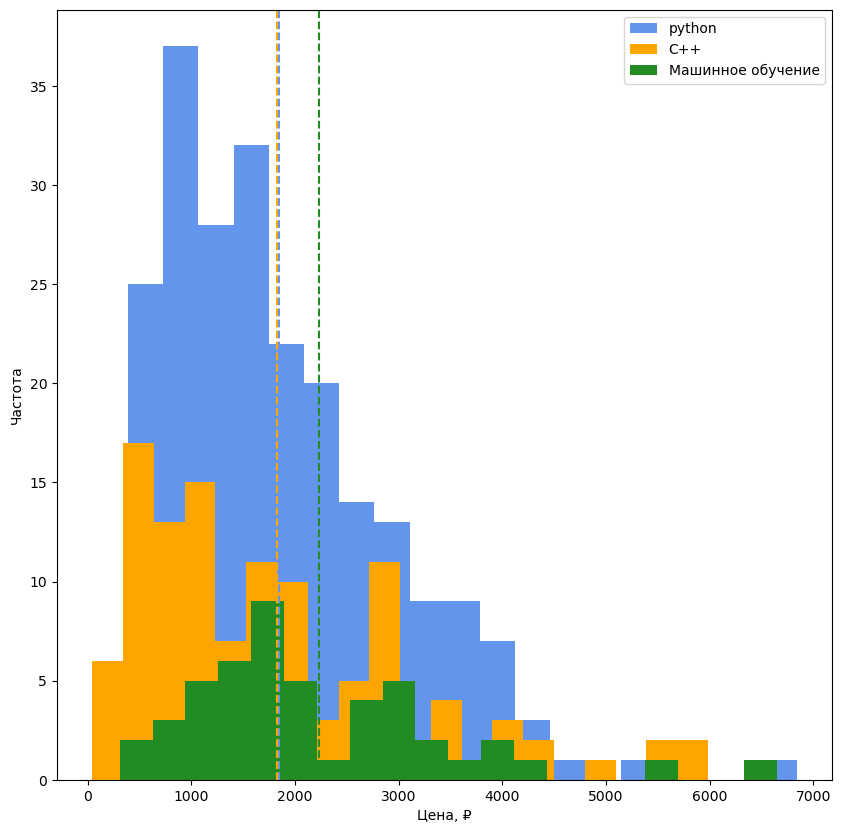

In [80]:
# Построим графики распределения цена по каждой категории, а так же выведем средние значения

fig, ax = plt.subplots(figsize=(10, 10))

colors = ['cornflowerblue', 'orange', 'forestgreen']

for phrase, color in zip(search_phrases, colors):
    
    print(f"Средняя цена на книги по {phrase}: {round(search_df.loc[search_df.phrase == phrase].price.mean())} ₽")
    
    ax.axvline(search_df.loc[search_df.phrase == phrase].price.mean(), ls='--', color=color)
    
    search_df.loc[search_df.phrase == phrase].price.plot(
        kind='hist',
        bins=20,
        alpha=1,
        color=color,
        label=phrase,
        ax = ax
    )
    
ax.set_xlabel('Цена, ₽')
ax.set_ylabel('Частота')
ax.legend()
ax.set_xticks(list(range(0, 7001, 1000)))



plt.show()

# Задание 2 про перевод из camel_case'a в snake_case

Дано произвольное название, написанное в camelCase, перевести его в snake_case

In [23]:
import re
v = 'camelCaseVar'
v1 = 'camelCaseWithNumbers1234'

#должно превратиться в camel_case_var

In [24]:
# Решение

pattern = re.compile(r'[A-Z]')

print(re.sub(pattern, lambda x: '_' + x.group(0).lower(), v))
print(re.sub(pattern, lambda x: '_' + x.group(0).lower(), v1))

camel_case_var
camel_case_with_numbers1234


## Задание 3, Про время 

Вовочка подготовил одно очень важное письмо, но везде указал неправильное время. 
Поэтому нужно заменить все вхождения времени на строку (TBD). Время — это строка вида HH:MM:SS или HH:MM, в которой HH — число от 00 до 23, а MM и SS — число от 00 до 59.

Ввод:

    Уважаемые! Если вы к 09:00 не вернёте 
    чемодан, то уже в 09:00:01 я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!
    
Вывод:

    Уважаемые! Если вы к (TBD) не вернёте 
    чемодан, то уже в (TBD) я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!

In [27]:
# Решение

inp = """Уважаемые! Если вы к 09:00 не вернёте 
чемодан, то уже в 09:00:01 я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!"""

new_line = re.sub(r'([0-1][0-9]|(?<=2)[0-4])(:[0-5][0-9])(:[0-5][0-9])?', '(TBD)', inp)

print(new_line)

Уважаемые! Если вы к (TBD) не вернёте 
чемодан, то уже в (TBD) я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!


# Задание 4 Про отчетность 

Владимиру потребовалось срочно запутать финансовую документацию. Но так, чтобы это было обратимо. 
Он не придумал ничего лучше, чем заменить каждое целое число (непрерывную последовательность цифр) на его куб. Помогите ему.

Ввод:

    Было закуплено 12 единиц техники 
    по 410.37 рублей.
    
Вывод:

    Было закуплено 1728 единиц техники 
    по 68921000.50653 рублей.

In [4]:
# Для решения вероятно в функцию sub надо будет пихать другую функцию. Пример "как это делать"

import re

def convert_func(matchobj):
    m =  matchobj.group(0)
    map = {'7': 'seven',
           '8': 'eight',
           '9': 'nine'}
    return map[m]

line = "7 ate 9"
new_line =  re.sub("[7-9]", convert_func, line)

new_line

'seven ate nine'

In [29]:
# Решение

def cube(matchobj):
    return str(int(matchobj.group(0))**3)

inp = """Было закуплено 12 единиц техники 
по 410.37 рублей."""

new_line = re.sub(r'[0-9]+', repl=cube, string=inp)

print(new_line)

Было закуплено 1728 единиц техники 
по 68921000.50653 рублей.


# Задание 5. Про NumPy и SVD

[Почитать про SVD - 1](http://timbaumann.info/svd-image-compression-demo/)

Сожмите картинку во всех трех каналах с помощью SVD (R,G и B) и оцените, сколько нужно компонент, чтобы получилось вменяемое качество. А сколько мы при этом экономим места?

[Как жать все 3 канала](https://www.kaggle.com/code/paulbacher/practical-applications-to-svd-on-rgb-images/notebook)

In [81]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

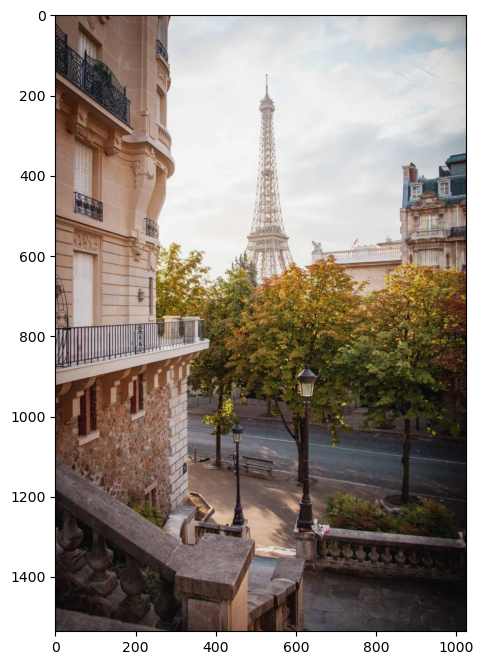

In [82]:
image = Image.open('Avenue-de-Camoens-Paris-Eiffel-Tower.png')
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()

In [83]:
# Решение

image_arr = np.array(image)
image_arr.shape

(1536, 1024, 3)

In [84]:
def svd_compressor(image, order):
    """Returns the compressed image channel at the specified order"""
    
    # Create an array filled with zeros having the shape of the image
    compressed = np.zeros(image.shape)
    
    # Get the U, S and V terms (S = SIGMA)
    U, S, V = np.linalg.svd(image)
    
    # Loop over U columns (Ui), S diagonal terms (Si) and V rows (Vi) until the chosen order
    for i in range(order):
        Ui = U[:, i].reshape(-1, 1)
        Vi = V[i, :].reshape(1, -1)
        Si = S[i]
        compressed += (Ui * Si * Vi)
    
    return compressed

compressing image...: 100%|█████████████████████| 10/10 [00:16<00:00,  1.70s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range 

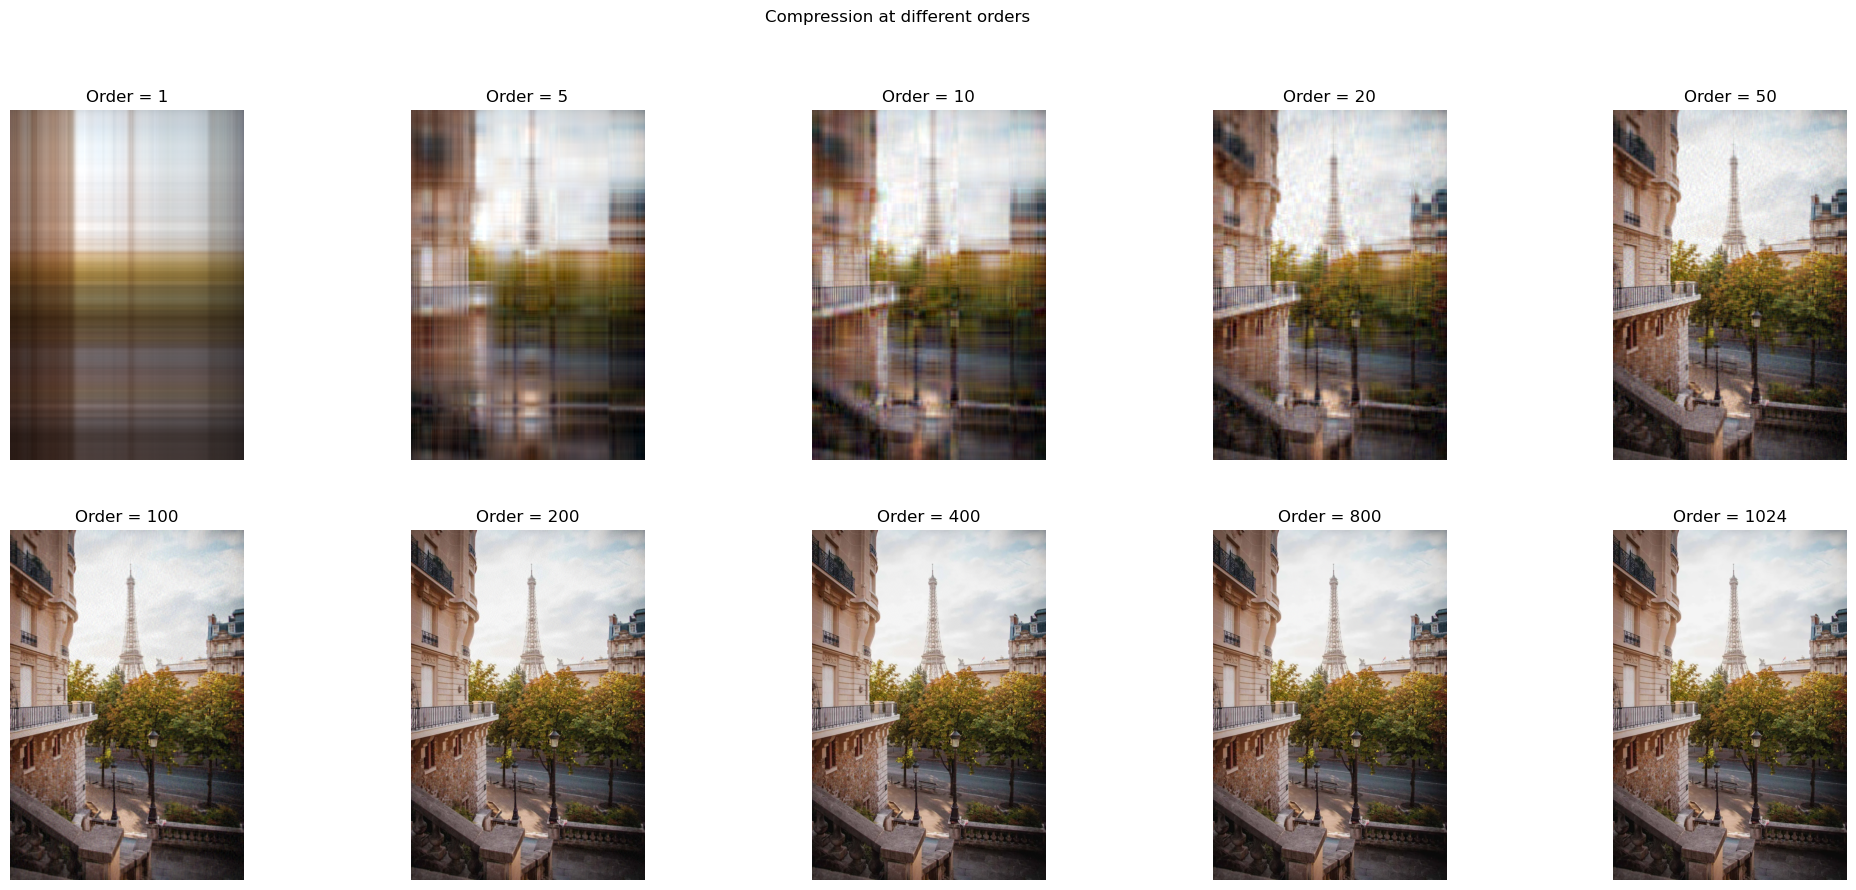

In [88]:
from matplotlib.widgets import Button, Slider

red_image = np.array(image)[:, :, 0]
green_image = np.array(image)[:, :, 1]
blue_image = np.array(image)[:, :, 2]

# generate compress images

orders = [1, 5, 10, 20, 50, 100, 200, 400, 800, 1024]
res = {}

plt.figure(figsize=(25, 10))

for i in tqdm(range(len(orders)), desc='compressing image...'):
    
    # Use the compressor function
    order = orders[i]
    red_comp = svd_compressor(red_image, order)
    green_comp = svd_compressor(green_image, order)
    blue_comp = svd_compressor(blue_image, order)
    
    # Combine images
    color_comp = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
    color_comp[:, :, 0] = red_comp
    color_comp[:, :, 1] = green_comp
    color_comp[:, :, 2] = blue_comp
    color_comp = np.around(color_comp).astype(int)
    
    res[orders[i]] = color_comp
    
for order, img in res.items():
    # Display the compressed colored image in the subplot
    plt.subplot(2, 5, orders.index(order)+1)
    plt.title("Order = {}".format(order))
    plt.axis('off')
    plt.imshow(img)
    
plt.suptitle('Compression at different orders')
plt.show()

In [89]:
# Проверим экономию места

(1536*1024) // ((1536+1024)*100)

6

Достаточно 100 компонент, чтобы получить ту же картинку в неплохом качестве. В таком случае мы экономим в 6 раз.